CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


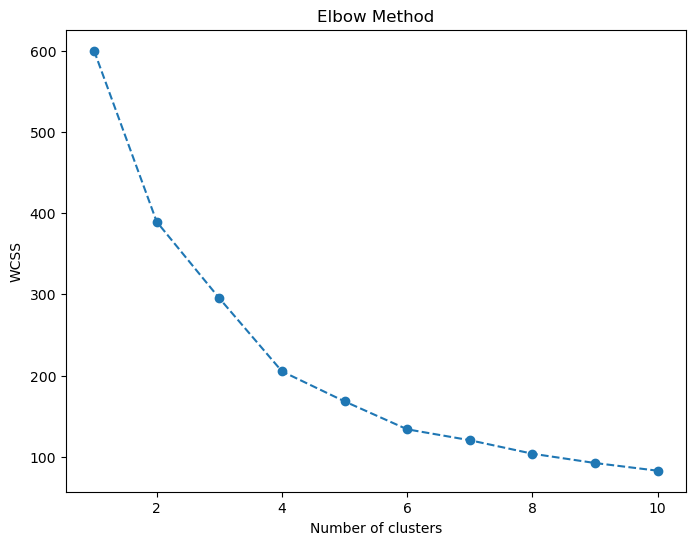

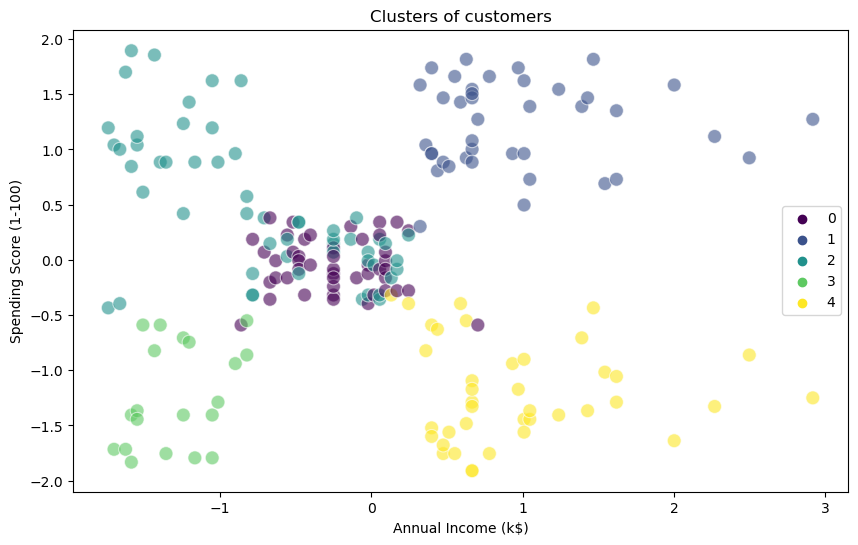

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
# For plotting inline in Jupyter notebooks
%matplotlib inline
# Load the dataset
file_path = 'Mall_customers.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()
# Check for missing values
print(df.isnull().sum())

# Encode the Gender column
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Standardize the numerical variables
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Display the first few rows of the preprocessed dataset
df.head()
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Display the first few rows of the dataset with the cluster labels
df.head()
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.6)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
